In [8]:
pip install kaggle

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
# Set plot style for aesthetics
sns.set(style='whitegrid')

# Load the dataset
df = pd.read_csv('/content/Spotify Most Streamed Songs.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


1. Numerical Variables

In [11]:
# Summary statistics for numerical variables
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


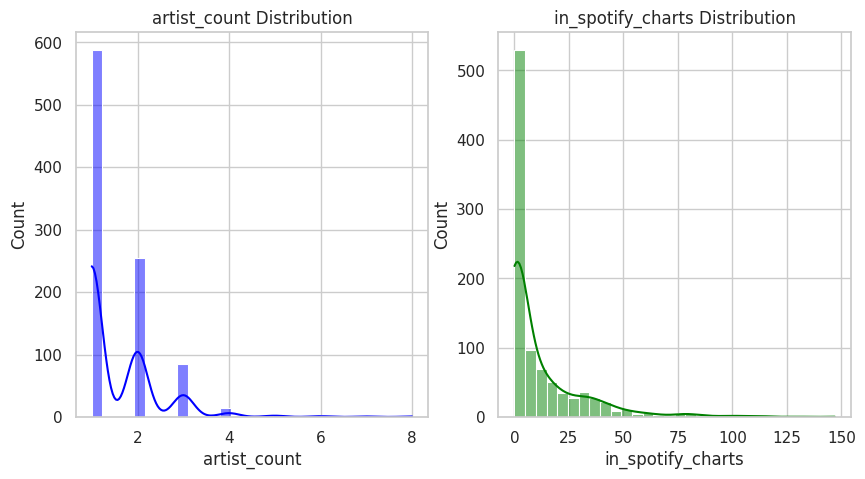

In [12]:
# Plot the distribution of artist_count and in_spotify_charts
plt.figure(figsize=(10,5))

# artist_count distribution
plt.subplot(1, 2, 1)
sns.histplot(df['artist_count'].dropna(), kde=True, color='blue', bins=30)
plt.title('artist_count Distribution')

# in_spotify_charts distribution
plt.subplot(1, 2, 2)
sns.histplot(df['in_spotify_charts'].dropna(), kde=True, color='green', bins=30)
plt.title('in_spotify_charts Distribution')

plt.show()

In [13]:
# Calculate skewness and kurtosis for artist_count and in_spotify_charts
artist_count_skewness = df['artist_count'].skew()
artist_count_kurtosis = df['artist_count'].kurt()
in_spotify_charts_skewness = df['in_spotify_charts'].skew()
in_spotify_charts_kurtosis = df['in_spotify_charts'].kurt()

print(f"artist_count Skewness: {artist_count_skewness}, artist_count Kurtosis: {artist_count_kurtosis}")
print(f"in_spotify_charts Skewness: {in_spotify_charts_skewness}, in_spotify_charts Kurtosis: {in_spotify_charts_kurtosis}")

artist_count Skewness: 2.5440322193207705, artist_count Kurtosis: 10.366704277485669
in_spotify_charts Skewness: 2.5804820731727247, in_spotify_charts Kurtosis: 8.507581363534308


2. Categorical Variables

<ipython-input-14-136d63f055ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='artist_count', data=df, palette='Set1')
<ipython-input-14-136d63f055ff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='key', data=df, palette='Set2')
<ipython-input-14-136d63f055ff>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mode', data=df, palette='Set3')


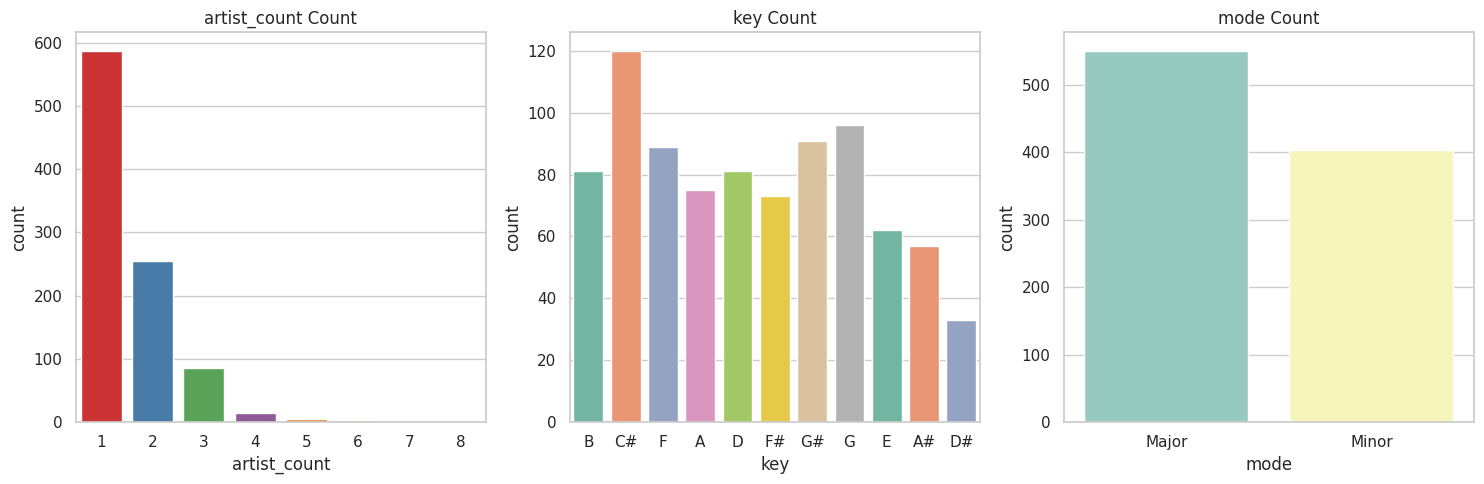

In [14]:
# Count plot for categorical variables
plt.figure(figsize=(15,5))

# artist_count count
plt.subplot(1, 3, 1)
sns.countplot(x='artist_count', data=df, palette='Set1')
plt.title('artist_count Count')

# key count
plt.subplot(1, 3, 2)
sns.countplot(x='key', data=df, palette='Set2')
plt.title('key Count')

# mode count
plt.subplot(1, 3, 3)
sns.countplot(x='mode', data=df, palette='Set3')
plt.title('mode Count')

plt.tight_layout()
plt.show()

In [15]:
# Mode for categorical variables
print("Mode of categorical variables:")
print(df[['artist_count', 'key', 'mode']].mode())

Mode of categorical variables:
   artist_count key   mode
0             1  C#  Major


In [16]:
# Select only numerical columns for correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

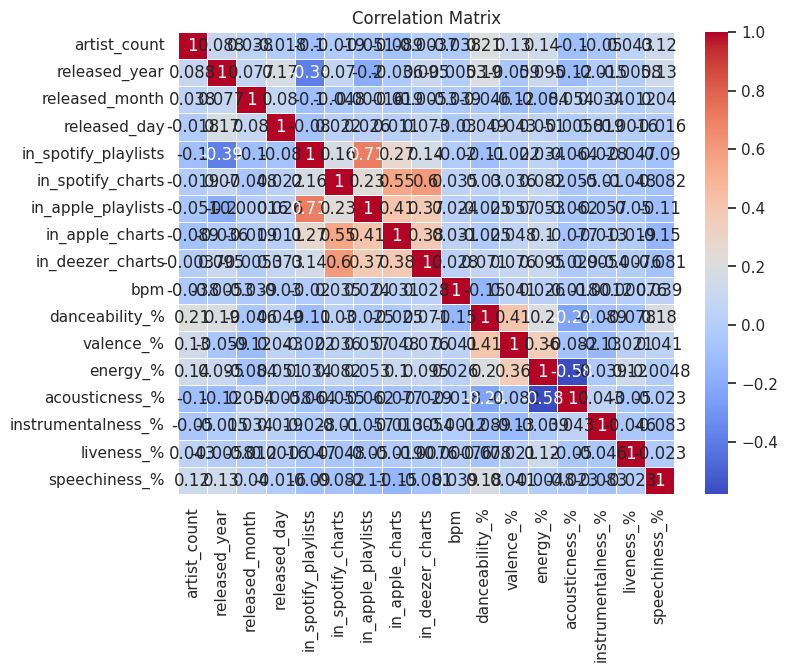

In [17]:
# Correlation matrix to observe relationships between numerical variables
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


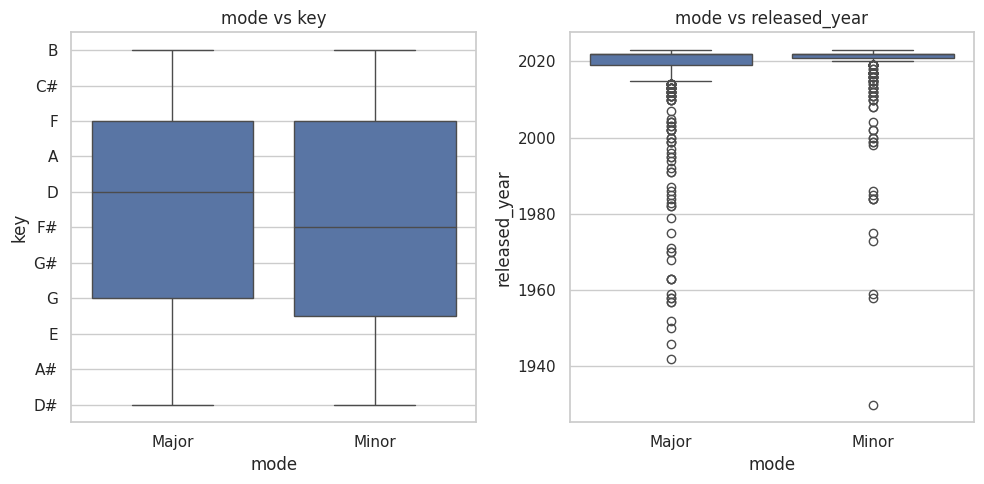

In [18]:
# Boxplot of key vs mode
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='mode', y='key', data=df)
plt.title('mode vs key')

# Boxplot of released_year vs mode
plt.subplot(1, 2, 2)
sns.boxplot(x='mode', y='released_year', data=df)
plt.title('mode vs released_year')

plt.tight_layout()
plt.show()


released_day   1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  \
released_year                                          ...                   
1930            1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1942            1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1946            1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1950            1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1952            1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1957            2   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1958            3   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1959            1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1963            0   0   0   0   0   0   0   0   0   0  ...   2   0   0   0   
1968            1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
1970            2   0   0   0   0   0   0   0   0   0  ...   0  

<ipython-input-19-c2535307d9ca>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


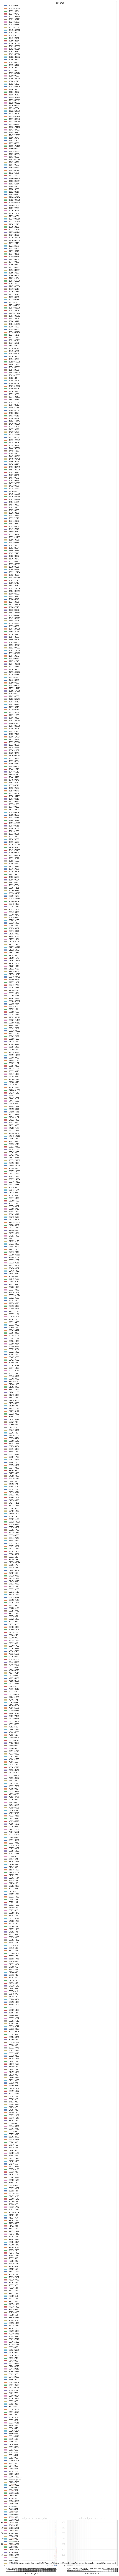

In [19]:
# Cross-tabulation between released_year and released_day
survived_sex = pd.crosstab(df['released_year'], df['released_day'])
print(survived_sex)

# Cross-tabulation between released_year and streams
survived_pclass = pd.crosstab(df['released_year'], df['streams'])
print(survived_pclass)

# Visualize cross-tabulations
plt.figure(figsize=(12, 5))

# released_year by released_day
plt.subplot(1, 2, 1)
survived_sex.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('released_year by released_day')

# released_year by streams
plt.subplot(1, 2, 2)
survived_pclass.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('released_year by streams')

plt.tight_layout()
plt.show()
